Neste exercício, você usará seu novo conhecimento para propor uma solução para um cenário do mundo real. Para ter sucesso, você precisará importar dados para Python, responder a perguntas usando os dados e gerar **histogramas** e **gráficos de densidade** para entender os padrões nos dados.

#### Cenário

Você trabalhará com um conjunto de dados do mundo real contendo informações coletadas de imagens microscópicas de tumores de câncer de mama, semelhantes à imagem abaixo.

![ex4_cancer_image](https://i.imgur.com/qUESsJe.png)

Cada tumor foi rotulado como [**benigno**](https://en.wikipedia.org/wiki/Benign_tumor) (não cancerígeno) ou **maligno** (cancerígeno).

Para saber mais sobre como esse tipo de dados é usado para criar algoritmos inteligentes para classificar tumores em ambientes médicos, **assista ao breve vídeo [nesse link](https://www.youtube.com/watch?v=9Mz84cwVmS0)**!



#### Configurações

Execute a próxima célula para importar e configurar as bibliotecas Python necessárias para concluir o exercício.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Passo 1: Carregar os dados

Nesta etapa, você carregará dois arquivos de dados.
- Carregue o arquivo de dados correspondente aos tumores **benignos** em um DataFrame chamado `cancer_b_data`. O caminho de arquivo correspondente é `cancer_b`. Use a coluna `'Id'` para rotular as linhas.
- Carregue o arquivo de dados correspondente aos tumores **malignos** em um DataFrame chamado `cancer_m_data`. O caminho de arquivo correspondente é `cancer_m`. Use a coluna `'Id'` para rotular as linhas.

In [2]:
# Arquivos contendo os conjuntos de dados
cancer_b = 'cancer_b.csv'
cancer_m = 'cancer_m.csv'

# Dados referentes a tumores benignos
cancer_b_data = pd.read_csv(cancer_b, index_col = 'Id')

# Dados referentes a tumores malignos
cancer_m_data = pd.read_csv(cancer_m, index_col = 'Id')

#### Passo 2: Revisar os dados

Use um comando Python para imprimir as primeiras 5 linhas dos dados para tumores benignos.

In [3]:
# Apresenta as 5 primeiras linhas da base de dados (tumores benignos)
cancer_b_data.head(5)

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


Use um comando Python para imprimir as primeiras 5 linhas de dados para tumores malignos.

In [5]:
# Apresenta as 5 primeiras linhas da base de dados (tumores malignos)
cancer_m_data.head(5)

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Nos conjuntos de dados, cada linha corresponde a uma imagem diferente. Cada conjunto de dados possui 31 colunas diferentes, correspondendo a:
- 1 coluna (`'Diagnóstico'`) que classifica os tumores como benignos (que aparece no conjunto de dados como **`B`**) ou malignos (__`M`__), e
- 30 colunas contendo diferentes medidas coletadas das imagens.

Use as primeiras 5 linhas dos dados (para tumores benignos e malignos) para responder às perguntas abaixo.

In [6]:
# Preencha a linha abaixo: Nas primeiras cinco linhas dos dados para tumores benignos, qual é o
# maior valor para 'Perímetro (média)'?
max_perim = 87.46

# Preencha a linha abaixo: Qual é o valor de 'Raio (média)' para o tumor com Id 842517?
mean_radius = 20.57

#### Passo 3: Investigar Diferenças

#### Parte A

Use a célula de código abaixo para criar dois histogramas que mostram a distribuição em valores de `'Área (média)'` para tumores benignos e malignos. (__Para permitir uma comparação fácil, crie uma única figura contendo ambos os histogramas na célula de código abaixo.__)

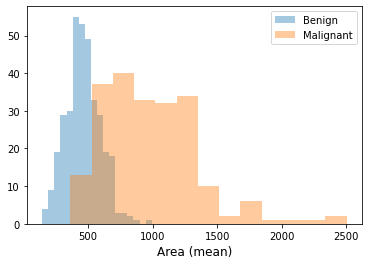

In [9]:
# Histogramas para tumores benignos e malignos
sns.distplot(a = cancer_b_data['Area (mean)'], label = 'Benign', kde = False)
sns.distplot(a = cancer_m_data['Area (mean)'], label = 'Malignant', kde = False)

# Adicionar rótulo ao eixo x
plt.xlabel('Area (mean)', fontsize = 'large')
plt.legend();

#### Parte B

Um pesquisador pede ajuda a você para identificar como a coluna "Área (média)" pode ser usada para entender a diferença entre tumores benignos e malignos. Com base nos histogramas acima,
- Os tumores malignos têm valores maiores ou menores para `'Área (média)'` (em relação a tumores benignos), em média?
- Qual tipo de tumor parece ter uma faixa maior de valores potenciais?

Solução: Tumores malignos têm valores mais altos para `'Área (média)'`, em média. Os tumores malignos têm uma gama maior de valores potenciais.

#### Passo 4: Uma coluna muito útil

#### Parte A

Use a célula de código abaixo para criar dois gráficos KDE que mostram a distribuição em valores para `'Raio (pior)'` para tumores benignos e malignos. (__Para permitir uma comparação fácil, crie uma única figura contendo ambos os gráficos do KDE na célula de código abaixo.__)

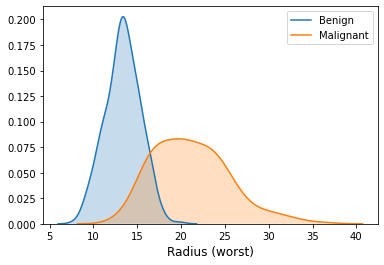

In [10]:
# Gráficos KDE para os tumores malignos e benignos
sns.kdeplot(data=cancer_b_data['Radius (worst)'], shade = True, label = 'Benign')
sns.kdeplot(data=cancer_m_data['Radius (worst)'], shade = True, label = 'Malignant')

# Adicionar rótulo ao eixo x
plt.xlabel('Radius (worst)', fontsize = 'large')
plt.legend();

#### Parte B

Um hospital começou recentemente a usar um algoritmo que pode diagnosticar tumores com alta precisão. Dado um tumor com um valor para `'Raio (pior)'` de 25, você acha que o algoritmo tem maior probabilidade de classificar o tumor como benigno ou maligno?

Solução: é mais provável que o algoritmo classifique o tumor como maligno. Isso ocorre porque a curva para tumores malignos é muito maior do que a curva para tumores benignos em torno de um valor de 25 - e um algoritmo que obtém alta precisão provavelmente tomará decisões com base neste padrão nos dados.